In [ ]:
import numpy as np

eval_data_original = np.load("/content/drive/MyDrive/Colab Notebooks/eval_data_complete.npy")
eval_label_original = np.load("/content/drive/MyDrive/Colab Notebooks/eval_label_complete.npy")

In [ ]:
eval_data = eval_data_original[10:-50]
eval_label = eval_label_original[10:-50]

test_data = np.concatenate((eval_data_original[:10], eval_data_original[-50:]))
test_label = np.concatenate((eval_label_original[:10], eval_label_original[-50:]))

eval_data_original = 0
eval_label_original = 0

In [ ]:
eval_data = np.concatenate((eval_data[:337], eval_data[:337], eval_data[:337], eval_data[:337], eval_data))
eval_label = np.concatenate((eval_label[:337], eval_label[:337], eval_label[:337], eval_label[:337], eval_label))
print(eval_data.shape)
print(eval_label.shape)

(3483, 22, 15000)
(3483,)


In [ ]:
idx = np.random.permutation(len(eval_data))
eval_data,eval_label = eval_data[idx], eval_label[idx]

In [ ]:
from tensorflow.keras.utils import to_categorical

enc_labels = to_categorical(eval_label, num_classes=2)              
eval_label= enc_labels
print(eval_data.shape)
print(eval_label.shape)
print(eval_data.dtype)
print(eval_label.dtype)
print('training labels have been loaded')

bs,t,f = eval_data.shape

(3483, 22, 15000)
(3483, 2)
float32
float32
training labels have been loaded


# Shallow Net

In [ ]:
from pdb import set_trace
#import mne
import pandas as pd
import numpy as np
import math
import os
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, Activation, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


# ----------------------SHALLOW-NET Testing-----------------------
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D,Conv2D
from tensorflow.keras.models import Model

inputsin= Input(shape=(t,f))


# ------------------First Inception
shallow_net = Conv1D(40, 25, strides=1, activation='relu',padding="causal")(inputsin)
shallow_net = Flatten()(shallow_net)
predictions = Dense(2,activation='softmax')(shallow_net)


shallow_model = Model(inputs=inputsin, outputs=predictions)

# learning rate to 0.00001
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

shallow_model.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
print(shallow_model.metrics_names)
print(shallow_model.summary())

# early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', verbose=1, patience=25)                          #patience
mc = ModelCheckpoint('shallow_model3flipped_acc.hdf5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)        #filepath (save model as)
mces = ModelCheckpoint('shallow_model3flipped_loss.hdf5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)      #filepath (save model as)

# fit model
hist=shallow_model.fit(eval_data,eval_label,validation_split=0.2,epochs=100,batch_size=128,verbose=1,shuffle=False) #epochs #split #
print('The End')

[]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 22, 40)            15000040  
_________________________________________________________________
flatten (Flatten)            (None, 880)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1762      
Total params: 15,001,802
Trainable params: 15,001,802
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
22/22 [==============================] - 42s 488ms/step - loss: 0.6511 - accuracy: 0.5898 - val_loss: 0.4560 - val_accuracy: 0.7719
Epoch 2/100
22/22 [==============================] - 6s 284ms/step - loss: 0.2518 - accuracy: 0

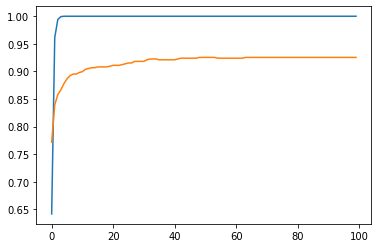

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [ ]:
predictions = Dense(2,activation='softmax')(shallow_net)
model_2 = Model(inputs=inputsin, outputs=predictions)

model_2.load_weights("shallow_model3flipped_loss.hdf5")

In [ ]:
pre = shallow_model.predict(test_data)
pre_2 = model_2.predict(test_data)

In [ ]:
res = []
for p in pre:
  if p[0] > p[1]:
    res.append([0, 1])
  else:
    res.append([1, 0])

res_2 = []
for p in pre_2:
  if p[0] > p[1]:
    res_2.append([0, 1])
  else:
    res_2.append([1, 0])

In [ ]:
corr = 0
for i in range(len(test_label)):
  #print(int(test_label[i]), res[i])
  if res[i][int(test_label[i])] == 1:
    #print('yes')
    corr += 1
print(corr)

corr = 0
for i in range(len(test_label)):
  #print(int(test_label[i]), res[i])
  if res_2[i][int(test_label[i])] == 1:
    #print('yes')
    corr += 1
print(corr)

12
15


In [ ]:
res = []
for p in pre:
  if p[1] < 0.03:
    res.append([1, 0])
  else:
    res.append([0, 1])

res_2 = []
for p in pre_2:
  if p[1] < 0.03:
    res_2.append([1, 0])
  else:
    res_2.append([0, 1])

In [ ]:
corr = 0
for i in range(len(test_label)):
  #print(int(test_label[i]), res[i])
  if res[i][int(test_label[i])] == 1:
    #print('yes')
    corr += 1
print(corr)

corr = 0
for i in range(len(test_label)):
  #print(int(test_label[i]), res[i])
  if res_2[i][int(test_label[i])] == 1:
    #print('yes')
    corr += 1
print(corr)

10
13


In [ ]:
print(shallow_model.predict(test_data))

[[0.25281793 0.7471821 ]
 [0.72404766 0.27595228]
 [0.7856749  0.2143251 ]
 [0.76175934 0.23824063]
 [0.81989497 0.18010497]
 [0.76353216 0.23646785]
 [0.8117934  0.18820655]
 [0.52035445 0.47964552]
 [0.5186682  0.4813318 ]
 [0.76572156 0.23427851]
 [0.93684304 0.06315695]
 [0.79165995 0.20833997]
 [0.6333247  0.36667538]
 [0.69226456 0.30773544]
 [0.9019221  0.09807794]
 [0.95221686 0.04778306]
 [0.6669905  0.33300945]
 [0.36939788 0.63060206]
 [0.5603227  0.43967733]
 [0.6762173  0.32378265]
 [0.78948754 0.21051246]
 [0.70735085 0.29264918]
 [0.9397076  0.06029246]
 [0.92022157 0.07977842]
 [0.5707762  0.42922378]
 [0.6341843  0.36581567]
 [0.7934092  0.20659074]
 [0.6086548  0.39134523]
 [0.7427899  0.25721008]
 [0.76853627 0.2314637 ]
 [0.96046257 0.03953742]
 [0.995256   0.00474402]
 [0.26038662 0.7396134 ]
 [0.7127538  0.28724626]
 [0.7474312  0.2525688 ]
 [0.54096824 0.45903176]
 [0.93654424 0.06345572]
 [0.9038258  0.09617423]
 [0.31642497 0.683575  ]
 [0.6343584  0.3656416 ]


# Quantization Starts here

In [ ]:
from pdb import set_trace
#import mne
import pandas as pd
import numpy as np
import math
import os
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, Activation, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


# ----------------------CHRONONET Testing-----------------------
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
inputsin= Input(shape=(t,f))
# ------------------First Inception
tower1 = Conv1D(32, 2, strides=2,activation='relu',padding="causal")(inputsin)
tower1 = BatchNormalization()(tower1)
tower2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(inputsin)
tower2 = BatchNormalization()(tower2)
tower3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(inputsin)
tower3 = BatchNormalization()(tower3)
x = concatenate([tower1,tower2,tower3],axis=2)
x = Dropout(0.45)(x)

# ----------------------Second Inception
tower1 = Conv1D(32, 2, strides=2,activation='relu',padding="causal")(x)
tower1 = BatchNormalization()(tower1)
tower2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(x)
tower2 = BatchNormalization()(tower2)
tower3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(x)
tower3 = BatchNormalization()(tower3)
x = concatenate([tower1,tower2,tower3],axis=2)
x = Dropout(0.45)(x)

# ----------------------------------Third Inception
tower1 = Conv1D(32, 2, strides=2,activation='relu',padding="causal")(x)
tower1 = BatchNormalization()(tower1)
tower2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(x)
tower2 = BatchNormalization()(tower2)
tower3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(x)
tower3 = BatchNormalization()(tower3)
x = concatenate([tower1,tower2,tower3],axis=2)
x = Dropout(0.45)(x)

res1 = GRU(32,activation='tanh',return_sequences=True)(x)
res2 = GRU(32,activation='tanh',return_sequences=True)(res1)
res1_2 = concatenate([res1,res2],axis=2)
res3 = GRU(32,activation='tanh',return_sequences=True)(res1_2)
x = concatenate([res1,res2,res3])
x = GRU(32,activation='tanh')(x)

predictions = Dense(2,activation='softmax')(x)
model = Model(inputs=inputsin, outputs=predictions)

# learning rate to 0.00001
#adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# learning rate to 0.0001
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
print(model.metrics_names)
print(model.summary())

# early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', verbose=1, patience=25)                          #patience
mc = ModelCheckpoint('model3flipped_acc.hdf5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)        #filepath (save model as)
mces = ModelCheckpoint('model3flipped_loss.hdf5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)      #filepath (save model as)

# fit model
hist=model.fit(eval_data,eval_label,validation_split=0.2,epochs=10,batch_size=128,verbose=1,callbacks=[es, mc,mces],shuffle=False) #epochs #split #

# fit model (without early stopping)
#hist=model.fit(eval_data,eval_label,validation_split=0.1,epochs=1000,batch_size=128,verbose=1,callbacks=[mc,mces],shuffle=False) #epochs #split #


print('The End')

[]
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 22, 15000)]  0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 11, 32)       960032      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 11, 32)       1920032     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 11, 32)       3840032     input_1[0][0]                    
___________________________________________________________________________________________

# qunatization aware training

In [ ]:
LastValueQuantizer = tfmot.quantization.keras.quantizers.LastValueQuantizer
MovingAverageQuantizer = tfmot.quantization.keras.quantizers.MovingAverageQuantizer

class DefaultDenseQuantizeConfig(tfmot.quantization.keras.QuantizeConfig):
    # Configure how to quantize weights.
    def get_weights_and_quantizers(self, layer):
      return [(layer.kernel, MovingAverageQuantizer(num_bits=8, symmetric=True, narrow_range=False, per_axis=False))]

    # Configure how to quantize activations.
    def get_activations_and_quantizers(self, layer):
      return [(layer.activation, MovingAverageQuantizer(num_bits=8, symmetric=False, narrow_range=False, per_axis=False))]

    def set_quantize_weights(self, layer, quantize_weights):
      # Add this line for each item returned in `get_weights_and_quantizers`
      # , in the same order
      layer.kernel = quantize_weights[0]

    def set_quantize_activations(self, layer, quantize_activations):
      # Add this line for each item returned in `get_activations_and_quantizers`
      # , in the same order.
      layer.activation = quantize_activations[0]

    # Configure how to quantize outputs (may be equivalent to activations).
    def get_output_quantizers(self, layer):
      return []

    def get_config(self):
      return {}

NameError: ignored

In [ ]:
quantize_scope = tfmot.quantization.keras.quantize_scope

class CustomLayer(tf.keras.layers.Dense):
  pass

# Helper function uses `quantize_annotate_layer` to annotate that only the 
# Dense layers should be quantized.
def apply_quantization_to_dense(layer):
  if isinstance(layer,tf.keras.layers.Dense):
    return tfmot.quantization.keras.quantize_annotate_layer(layer, DefaultDenseQuantizeConfig())
  if isinstance(layer,tf.keras.layers.Conv1D):
    return tfmot.quantization.keras.quantize_annotate_layer(layer, DefaultDenseQuantizeConfig())
  #if isinstance(layer,tf.keras.layers.GRU):
  #  return tfmot.quantization.keras.quantize_annotate_layer(layer, DefaultDenseQuantizeConfig())
  
  return layer
# Use `tf.keras.models.clone_model` to apply `apply_quantization_to_dense` 
# to the layers of the model.
annotated_model = tf.keras.models.clone_model(
    model,
    clone_function=apply_quantization_to_dense,
)

# Now that the Dense layers are annotated,
# `quantize_apply` actually makes the model quantization aware.
#quant_aware_model.summary()


with quantize_scope(
  {'DefaultDenseQuantizeConfig': DefaultDenseQuantizeConfig,
   'CustomLayer': CustomLayer}):
  # Use `quantize_apply` to actually make the model quantization aware.
  quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)


quant_aware_model.summary()

# BREVITAS

In [2]:
!pip install brevitas

     |████████████████████████████████| 348kB 12.5MB/s 


In [3]:
from torch import nn
from torch.nn import Module
import torch.nn.functional as F

import brevitas.nn as qnn

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


### data for code testing

In [4]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip kagglecatsanddogs_3367a.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats():
  IMG_SIZE = 50

  CATS = "PetImages/Cat"
  DOGS = "PetImages/Dog"
  TESTING = "PetImages/Testing"
  
  LABELS = {CATS: 0, DOGS: 1}

  training_data = []

  catcount = 0
  dogcount = 0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
    
          if label == self.CATS:
            self.catcount += 1
          elif label == self.DOGS:
            self.dogcount += 1

        except Exception as e:
          pass

    np.random.shuffle(self.training_data)
    np.save("training_data.npy", self.training_data)

    print("Cats:", self.catcount)
    print("Dogs:", self.dogcount)

if REBUILD_DATA:
  dogsvcats = DogsVSCats()
  dogsvcats.make_training_data()


  0%|          | 25/12501 [00:00<00:50, 249.42it/s]

PetImages/Cat


  1%|          | 68/12501 [00:00<00:18, 673.29it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:17<00:00, 700.00it/s]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


24946


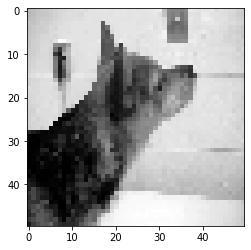

[0. 1.]
22452
2494


In [6]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show()

print(training_data[1][1])

import torch
import torch.nn as nn
import torch.nn.functional as F

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
#print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))


In [ ]:
from torch import nn
import torch.nn.functional as F

import brevitas.nn as qnn
from brevitas.quant import Int8Bias as BiasQuant


class Shallow_Net(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.quant_inp = qnn.QuantIdentity(bit_width=4, return_quant_tensor=True)

    self.conv1 = qnn.QuantConv1d(50, 128, 3, weight_bit_width=4, bias_quant=BiasQuant, return_quant_tensor=True)
    self.relu1 = qnn.QuantReLU(bit_width=4, return_quant_tensor=True)

    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.convs(x)

    self.fc1 = qnn.QuantLinear(self._to_linear, 2, bias=False, weight_bit_width=4)

  def convs(self, x):
    x = self.quant_inp(x)
    x = self.relu1(self.conv1(x))
    x = F.avg_pool1d(x, 2)

    if self._to_linear == None:
      self._to_linear = x[0].shape[0]*x[0].shape[1]
    return x

  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = self.fc1(x)

    return F.softmax(x, dim=1)


shallow_net = Shallow_Net()
#print(test_net)

'''
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("running on the gpu")
else:
  device = torch.device("cpu")
  print("running on the CPU")

shallow_net.to(device)
'''



'\nif torch.cuda.is_available():\n  device = torch.device("cuda:0")\n  print("running on the gpu")\nelse:\n  device = torch.device("cpu")\n  print("running on the CPU")\n\nshallow_net.to(device)\n'

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(shallow_net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    shallow_net.zero_grad()
  outputs = shallow_net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

import numpy as np

def test(size=32):  
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 50, 50), y)
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)


import time

MODEL_NAME = f"model-{int(time.time())}"


print(MODEL_NAME)

def train():
  BATCH_SIZE = 132
  EPOCHS = 10

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        
        # every 50 steps 
        if i % 50 == 0:
          val_acc, val_loss = test(size=132)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc), 2)}, {round(float(loss), 4)},{round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

  1%|          | 1/171 [00:00<00:19,  8.94it/s]

0.4375 tensor(0.2504)
model-1616050698


100%|██████████| 171/171 [00:10<00:00, 15.59it/s]


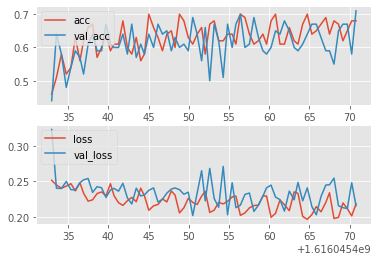

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


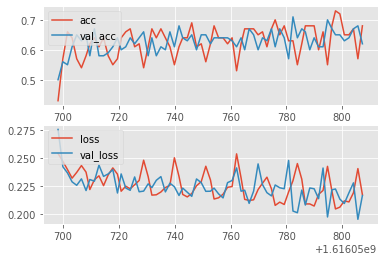

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


# DeepNet

In [ ]:
from torch import nn
import torch.nn.functional as F

import brevitas.nn as qnn
from brevitas.quant import Int8Bias as BiasQuant


class Deep_Net(nn.Module):
  def __init__(self):
    super().__init__()

    
    self.quant_inp = qnn.QuantIdentity(bit_width=4, return_quant_tensor=True)
    
    
    self.conv1 = qnn.QuantConv1d(50, 75, 3, weight_bit_width=4, bias_quant=BiasQuant, return_quant_tensor=True)
    self.relu1 = qnn.QuantReLU(bit_width=4, return_quant_tensor=True)
    self.conv2 = qnn.QuantConv1d(75, 100, 3, weight_bit_width=4, bias_quant=BiasQuant, return_quant_tensor=True)
    self.relu2 = qnn.QuantReLU(bit_width=4, return_quant_tensor=True)
    self.conv3 = qnn.QuantConv1d(100, 125, 3, weight_bit_width=4, bias_quant=BiasQuant, return_quant_tensor=True)
    self.relu3 = qnn.QuantReLU(bit_width=4, return_quant_tensor=True)
    self.conv4 = qnn.QuantConv1d(125, 150, 3, weight_bit_width=4, bias_quant=BiasQuant, return_quant_tensor=True)
    self.relu4 = qnn.QuantReLU(bit_width=4, return_quant_tensor=True)

    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.convs(x)

    self.fc1 = qnn.QuantLinear(self._to_linear, 2, bias=False, weight_bit_width=4)

  def convs(self, x):
    x = self.quant_inp(x)
    x = F.max_pool1d(self.relu1(self.conv1(x)), 2)
    x = F.max_pool1d(self.relu2(self.conv2(x)), 2)
    x = F.max_pool1d(self.relu3(self.conv3(x)), 2)
    x = F.max_pool1d(self.relu4(self.conv4(x)), 2)

    if self._to_linear == None:
      self._to_linear = x[0].shape[0]*x[0].shape[1]
    return x

  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = self.fc1(x)

    return F.softmax(x, dim=1)


deep_net = Deep_Net()
print(deep_net)



Deep_Net(
  (quant_inp): QuantIdentity(
    (input_quant): ActQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
    )
    (act_quant): ActQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
      (fused_activation_quant_proxy): FusedActivationQuantProxy(
        (activation_impl): Identity()
        (tensor_quant): RescalingIntQuant(
          (int_quant): IntQuant(
            (float_to_int_impl): RoundSte()
            (tensor_clamp_impl): TensorClamp()
            (delay_wrapper): DelayWrapper(
              (delay_impl): _NoDelay()
            )
          )
          (scaling_impl): ParameterFromRuntimeStatsScaling(
            (stats_input_view_shape_impl): OverTensorView()
            (stats): _Stats(
              (stats_impl): AbsPercentile()
            )
            (restrict_clamp_scaling): _RestrictClampValue(
              (clamp_min_ste): Identity()
              (restrict_value_impl): FloatRestrictValue()
            )
            (res

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(deep_net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    deep_net.zero_grad()
  outputs = deep_net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

import numpy as np

def test(size=32):  
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 50, 50), y)
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)


import time

MODEL_NAME = f"model-{int(time.time())}"


print(MODEL_NAME)

def train():
  BATCH_SIZE = 132
  EPOCHS = 100

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        
        # every 50 steps 
        if i % 50 == 0:
          val_acc, val_loss = test(size=132)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc), 2)}, {round(float(loss), 4)},{round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

  1%|          | 1/171 [00:00<00:20,  8.44it/s]

0.75 tensor(0.1747)
model-1617181946


100%|██████████| 171/171 [00:14<00:00, 11.49it/s]


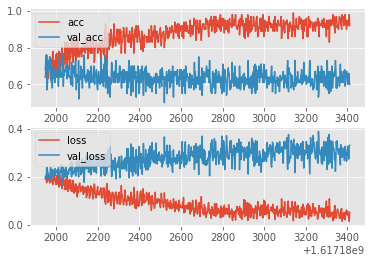

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


# Chrono_net

In [ ]:
from typing import Any

class BasicConv1d(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv1d, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, bias=False, **kwargs)
        #self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        #x = self.bn(x)
        return F.relu(x, inplace=True)


class ChronoNet(nn.Module):
  def __init__(self):
    super().__init__()
    
    conv_block = BasicConv1d
    
    # inception 01
    self.conv_11 = conv_block(50, 32, stride=2, kernel_size=1)
    self.conv_12 = conv_block(50, 32, stride=2, kernel_size=3, padding=1)
    self.conv_13 = conv_block(50, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_1 = nn.Dropout(p=0.45)
    
    # inception 02
    self.conv_21 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_22 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_23 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_2 = nn.Dropout(p=0.45)
    
    # inception 03
    self.conv_31 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_32 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_33 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_3 = nn.Dropout(p=0.55)
    
    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.convs(x)

    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)


  def convs(self, x):    
    # inception 01
    x_11 = self.conv_11(x)
    x_12 = self.conv_12(x)
    x_13 = self.conv_13(x)
    inception_01 = [x_11, x_12, x_13]
    inception_01 = torch.cat(inception_01, 1)
    inception_01 = self.dropout_1(inception_01)

    
    # inception 02
    x_21 = self.conv_21(inception_01)
    x_22 = self.conv_22(inception_01)
    x_23 = self.conv_23(inception_01)
    inception_02 = [x_21, x_22, x_23]
    inception_02 = torch.cat(inception_02, 1)
    inception_02 = self.dropout_2(inception_02)

    
    # inception 03
    x_31 = self.conv_31(inception_02)
    x_32 = self.conv_32(inception_02)
    x_33 = self.conv_33(inception_02)
    inception_03 = [x_31, x_32, x_33]
    inception_03 = torch.cat(inception_03, 1)
    inception_03 = self.dropout_3(inception_03)
    
    print(inception_01.shape)

    if self._to_linear == None:
      # self._to_linear = inception_01[0].shape[0] * inception_01[0].shape[1] * inception_01[0].shape[2]
      self._to_linear = inception_01[0].shape[0] * inception_01[0].shape[1]
 
    return inception_01


  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return F.softmax(x, dim=1)


chrono_net = ChronoNet()
#print(test_net)

'''

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("running on the gpu")
else:
  device = torch.device("cpu")
  print("running on the CPU")

chronoNet.to(device)
'''

torch.Size([1, 96, 25])


'\n\nif torch.cuda.is_available():\n  device = torch.device("cuda:0")\n  print("running on the gpu")\nelse:\n  device = torch.device("cpu")\n  print("running on the CPU")\n\nchronoNet.to(device)\n'

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(chrono_net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    chrono_net.zero_grad()
  outputs = chrono_net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

import numpy as np

def test(size=32):  
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 50, 50), y)
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)


import time

MODEL_NAME = f"model-{int(time.time())}"


print(MODEL_NAME)

def train():
  BATCH_SIZE = 132
  EPOCHS = 10

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        
        # every 50 steps 
        if i % 50 == 0:
          val_acc, val_loss = test(size=132)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc), 2)}, {round(float(loss), 4)},{round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

  1%|          | 1/171 [00:00<00:17,  9.93it/s]

0.5625 tensor(0.2461)
model-1617190619


100%|██████████| 171/171 [00:08<00:00, 19.71it/s]


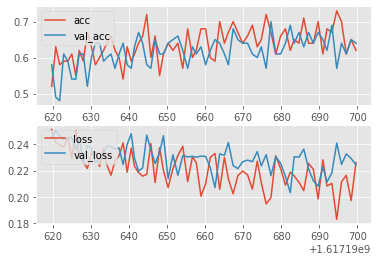

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from typing import Any

class BasicGRU(nn.Module):
  def __init__(
      self,
      in_size:int,
      hidden_size:int,
      n_layers:int,
      **kwargs: Any
    ) -> None:
    
    super().__init__()
    
    self.num_directions = 1
    self.in_size = in_size
    self.hidden_size = hidden_size
    self.n_layers = n_layers

    self.gru = nn.GRU(in_size, hidden_size, n_layers, batch_first=True, **kwargs)

    #self.h_0 = torch.randn(self.n_layers * self.num_directions, self.batch, self.hidden_size)


  def set_values(self, x):
    self.batch = x.shape[0]

  
  def forward(self, x):
    self.set_values(x)
    self.h_0 = torch.randn(self.n_layers * self.num_directions, self.batch, self.hidden_size)

    x, _ = self.gru(x, self.h_0)
    #print(x[:,-1])
    
    #return F.relu(x[:, -1], inplace=True)
    return x


class GRU_Net(nn.Module):
  def __init__(self):
    super().__init__()
    
    gru_block = BasicGRU

    #x = torch.randn(50, in_size).view(-1, 50, in_size)
    #self.batch = None
    #self.set_batchsize(x)

    self.gru_1 = gru_block(50, 32, 1)
    self.gru_2 = gru_block(32, 32, 1)    
    self.gru_3 = gru_block(64, 32, 1)
    self.gru_4 = gru_block(96, 32, 1)

    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.grus(x)

    #self.fc1 = nn.Linear(self._to_linear, 512)
    #self.fc2 = nn.Linear(512, 2)

    self.fc1 = nn.Linear(self._to_linear, 2)
 
  def set_batchsize(self, x):
    self.batch = x.shape[0]
  
  def grus(self, x):
    x_1 = self.gru_1(x)
    x_2 = self.gru_2(x_1)
    
    x_12 = [x_1, x_2]
    x_12 = torch.cat(x_12, 2)
    
    x_3 = self.gru_3(x_12)

    x_123 = [x_1, x_2, x_3]
    x_123 = torch.cat(x_123, 2)

    x_4 = self.gru_4(x_123)
    


    
    x = F.relu(x_4[:, -1], inplace=True)

    if self._to_linear == None:
      self._to_linear = x[0].shape[0]#*x[0].shape[1]
      #print(x[0].shape)
      #print(self._to_linear)

    return x
  
  def forward(self, x):
    x = self.grus(x)
    x = x.reshape(-1, self._to_linear)
    #x = F.relu(self.fc1(x))
    #x = self.fc2(x)

    x = self.fc1(x)
  
    return F.softmax(x, dim=1)

gru_net = GRU_Net()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(gru_net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    gru_net.zero_grad()
  outputs = gru_net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

import numpy as np

def test(size=32):  
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 50, 50), y)
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)


import time

MODEL_NAME = f"model-{int(time.time())}"


print(MODEL_NAME)

def train():
  BATCH_SIZE = 132
  EPOCHS = 10

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        
        # every 50 steps 
        if i % 50 == 0:
          val_acc, val_loss = test(size=132)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc), 2)}, {round(float(loss), 4)},{round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

  0%|          | 0/171 [00:00<?, ?it/s]

0.40625 tensor(0.2671)
model-1617744207


100%|██████████| 171/171 [00:20<00:00,  8.20it/s]


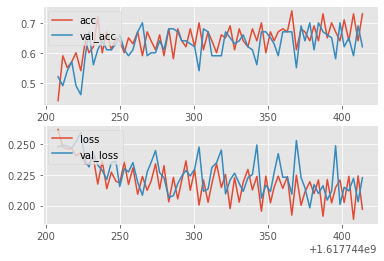

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


In [22]:
from typing import Any

class BasicConv1d(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv1d, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, bias=False, **kwargs)
        #self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        #x = self.bn(x)
        return F.relu(x, inplace=True)


class BasicGRU(nn.Module):
  def __init__(
      self,
      in_size:int,
      hidden_size:int,
      n_layers:int,
      **kwargs: Any
    ) -> None:
    
    super().__init__()
    
    self.num_directions = 1
    self.in_size = in_size
    self.hidden_size = hidden_size
    self.n_layers = n_layers

    self.gru = nn.GRU(in_size, hidden_size, n_layers, batch_first=True, **kwargs)

    #self.h_0 = torch.randn(self.n_layers * self.num_directions, self.batch, self.hidden_size)


  def set_values(self, x):
    self.batch = x.shape[0]

  
  def forward(self, x):
    self.set_values(x)
    self.h_0 = torch.randn(self.n_layers * self.num_directions, self.batch, self.hidden_size)

    x, _ = self.gru(x, self.h_0)
    #print(x[:,-1])
    
    #return F.relu(x[:, -1], inplace=True)
    return x


class ChronoNet(nn.Module):
  def __init__(self):
    super().__init__()
    

    conv_block = BasicConv1d
    gru_block = BasicGRU

    #x = torch.randn(50, in_size).view(-1, 50, in_size)
    #self.batch = None
    #self.set_batchsize(x)



    # CONVOLUTIONS ------ CONVOLUTIONS

    # inception 01
    self.conv_11 = conv_block(50, 32, stride=2, kernel_size=1)
    self.conv_12 = conv_block(50, 32, stride=2, kernel_size=3, padding=1)
    self.conv_13 = conv_block(50, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_1 = nn.Dropout(p=0.45)
    
    # inception 02
    self.conv_21 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_22 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_23 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_2 = nn.Dropout(p=0.45)
    
    # inception 03
    self.conv_31 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_32 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_33 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_3 = nn.Dropout(p=0.55)

    # CONVOLUTIONS ----- CONVOLUTIONS


    self.gru_1 = gru_block(96, 32, 1)
    self.gru_2 = gru_block(32, 32, 1)    
    self.gru_3 = gru_block(64, 32, 1)
    self.gru_4 = gru_block(96, 32, 1)

    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.conv_grus(x)

    #self.fc1 = nn.Linear(self._to_linear, 512)
    #self.fc2 = nn.Linear(512, 2)

    self.fc1 = nn.Linear(self._to_linear, 2)
 
  def set_batchsize(self, x):
    self.batch = x.shape[0]
  
  def conv_grus(self, x):
    

    # tower 01
    x_11 = self.conv_11(x)
    x_12 = self.conv_12(x)
    x_13 = self.conv_13(x)
    tower_01 = [x_11, x_12, x_13]
    tower_01 = torch.cat(tower_01, 1)
    tower_01 = self.dropout_1(tower_01)

    
    # tower 02
    x_21 = self.conv_21(tower_01)
    x_22 = self.conv_22(tower_01)
    x_23 = self.conv_23(tower_01)
    tower_02 = [x_21, x_22, x_23]
    tower_02 = torch.cat(tower_02, 1)
    tower_02 = self.dropout_2(tower_02)

    
    # tower 03
    x_31 = self.conv_31(tower_02)
    x_32 = self.conv_32(tower_02)
    x_33 = self.conv_33(tower_02)
    tower_03 = [x_31, x_32, x_33]
    tower_03 = torch.cat(tower_03, 1)
    tower_03 = self.dropout_3(tower_03)
    

    x = tower_03.reshape(-1, tower_03.shape[2], tower_03.shape[1])


    #print(f'Tower output {x.shape}')
    
    # CONVOLUTIONS ------ GRU
        
    x_1 = self.gru_1(x)
    x_2 = self.gru_2(x_1)
    
    x_12 = [x_1, x_2]
    x_12 = torch.cat(x_12, 2)
    
    x_3 = self.gru_3(x_12)

    x_123 = [x_1, x_2, x_3]
    x_123 = torch.cat(x_123, 2)

    x_4 = self.gru_4(x_123)
    
    #print(f'GRU output {x_4.shape}')
    
    x = F.relu(x_4[:, -1], inplace=True)

    if self._to_linear == None:
      self._to_linear = x[0].shape[0]#*x[0].shape[1]
      #print(x[0].shape)
      #print(self._to_linear)

    return x
  
  def forward(self, x):
    x = self.conv_grus(x)
    x = x.reshape(-1, self._to_linear)
    #x = F.relu(self.fc1(x))
    #x = self.fc2(x)

    x = self.fc1(x)
  
    return F.softmax(x, dim=1)

chrono_net = ChronoNet()





class ChronoNet_CNNPart(nn.Module):
  def __init__(self):
    super().__init__()
    
    conv_block = BasicConv1d


    
    # inception 01
    self.conv_11 = conv_block(50, 32, stride=2, kernel_size=1)
    #self.batch_conv_11 = nn. 
    self.conv_12 = conv_block(50, 32, stride=2, kernel_size=3, padding=1)
    self.conv_13 = conv_block(50, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_1 = nn.Dropout(p=0.45)
    
    # inception 02
    self.conv_21 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_22 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_23 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_2 = nn.Dropout(p=0.45)
    
    # inception 03
    self.conv_31 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_32 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_33 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_3 = nn.Dropout(p=0.55)
    
    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.convs(x)

    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)


  def convs(self, x):    
    # inception 01
    x_11 = self.conv_11(x)
    #x_11 = nn.BatchNorm1d(x_11)
    x_12 = self.conv_12(x)
    #x_12 = nn.BatchNorm1d(x_12)
    x_13 = self.conv_13(x)
    #x_13 = nn.BatchNorm1d(x_13)
    inception_01 = [x_11, x_12, x_13]
    inception_01 = torch.cat(inception_01, 1)
    inception_01 = self.dropout_1(inception_01)

    
    # inception 02
    x_21 = self.conv_21(inception_01)
    #x_21 = nn.BatchNorm1d(x_21)
    x_22 = self.conv_22(inception_01)
    #x_22 = nn.BatchNorm1d(x_22)
    x_23 = self.conv_23(inception_01)
    #x_23 = nn.BatchNorm1d(x_23)
    inception_02 = [x_21, x_22, x_23]
    inception_02 = torch.cat(inception_02, 1)
    inception_02 = self.dropout_2(inception_02)

    
    # inception 03
    x_31 = self.conv_31(inception_02)
    #x_31 = nn.BatchNorm1d(x_31)
    x_32 = self.conv_32(inception_02)
    #x_32 = nn.BatchNorm1d(x_32)
    x_33 = self.conv_33(inception_02)
    #x_33 = nn.BatchNorm1d(x_33)
    inception_03 = [x_31, x_32, x_33]
    inception_03 = torch.cat(inception_03, 1)
    inception_03 = self.dropout_3(inception_03)
    

    inception_01 = inception_01.reshape(-1, inception_01.shape[2], inception_01.shape[1])
    print(inception_01.shape)
    print(inception_03.shape)

    if self._to_linear == None:
      # self._to_linear = inception_01[0].shape[0] * inception_01[0].shape[1] * inception_01[0].shape[2]
      self._to_linear = inception_01[0].shape[0] * inception_01[0].shape[1]
 
    return inception_01


  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return F.softmax(x, dim=1)


chronoNet_cnnpart = ChronoNet_CNNPart()
#print(test_net)

'''

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("running on the gpu")
else:
  device = torch.device("cpu")
  print("running on the CPU")

chronoNet.to(device)
'''

torch.Size([1, 25, 96])
torch.Size([1, 96, 7])


'\n\nif torch.cuda.is_available():\n  device = torch.device("cuda:0")\n  print("running on the gpu")\nelse:\n  device = torch.device("cpu")\n  print("running on the CPU")\n\nchronoNet.to(device)\n'

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(chrono_net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    chrono_net.zero_grad()
  outputs = chrono_net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

import numpy as np

def test(size=32):  
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 50, 50), y)
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)


import time

MODEL_NAME = f"model-{int(time.time())}"


print(MODEL_NAME)

def train():
  BATCH_SIZE = 132
  EPOCHS = 10

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        
        # every 50 steps 
        if i % 50 == 0:
          val_acc, val_loss = test(size=132)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc), 2)}, {round(float(loss), 4)},{round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

  1%|          | 1/171 [00:00<00:17,  9.57it/s]

0.53125 tensor(0.2545)
model-1617746926


100%|██████████| 171/171 [00:13<00:00, 13.14it/s]


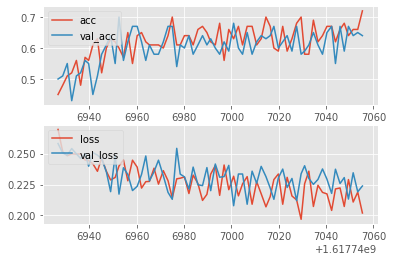

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


In [ ]:
from typing import Any

from torch import nn
import torch.nn.functional as F

import brevitas.nn as qnn
from brevitas.quant import Int8Bias as BiasQuant

class BasicConv1d(nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv1d, self).__init__()
        self.conv = qnn.QuantConv1d(in_channels, out_channels, weight_bit_width=4, bias_quant=BiasQuant, return_quant_tensor=True, bias=False, **kwargs)
        #self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

        self.relu = qnn.QuantReLU(bit_width=4, return_quant_tensor=True)

    def forward(self, x):
        x = self.conv(x)
        #x = self.bn(x)
        return F.relu(x, inplace=True)


class BasicGRU(nn.Module):
  def __init__(
      self,
      in_size:int,
      hidden_size:int,
      n_layers:int,
      **kwargs: Any
    ) -> None:
    
    super().__init__()
    
    self.num_directions = 1
    self.in_size = in_size
    self.hidden_size = hidden_size
    self.n_layers = n_layers

    self.gru = nn.GRU(in_size, hidden_size, n_layers, batch_first=True, **kwargs)

    

    #self.h_0 = torch.randn(self.n_layers * self.num_directions, self.batch, self.hidden_size)


  def set_values(self, x):
    self.batch = x.shape[0]

  
  def forward(self, x):
    self.set_values(x)
    self.h_0 = torch.randn(self.n_layers * self.num_directions, self.batch, self.hidden_size)

    x, _ = self.gru(x, self.h_0)
    #print(x[:,-1])
    
    #return F.relu(x[:, -1], inplace=True)
    return x


class ChronoNet(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.quant_inp = qnn.QuantIdentity(bit_width=4, return_quant_tensor=True)

    conv_block = BasicConv1d
    gru_block = BasicGRU

    #x = torch.randn(50, in_size).view(-1, 50, in_size)
    #self.batch = None
    #self.set_batchsize(x)



    # CONVOLUTIONS ------ CONVOLUTIONS

    # inception 01
    self.conv_11 = conv_block(50, 32, stride=2, kernel_size=1)
    self.conv_12 = conv_block(50, 32, stride=2, kernel_size=3, padding=1)
    self.conv_13 = conv_block(50, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_1 = nn.Dropout(p=0.45)
    
    # inception 02
    self.conv_21 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_22 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_23 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_2 = nn.Dropout(p=0.45)
    
    # inception 03
    self.conv_31 = conv_block(96, 32, stride=2, kernel_size=1)
    self.conv_32 = conv_block(96, 32, stride=2, kernel_size=3, padding=1)
    self.conv_33 = conv_block(96, 32, stride=2, kernel_size=5, padding=2)
    self.dropout_3 = nn.Dropout(p=0.55)

    # CONVOLUTIONS ----- CONVOLUTIONS


    self.gru_1 = gru_block(96, 32, 1)
    self.gru_2 = gru_block(32, 32, 1)    
    self.gru_3 = gru_block(64, 32, 1)
    self.gru_4 = gru_block(96, 32, 1)

    x = torch.randn(50, 50).view(-1, 50, 50)
    self._to_linear = None
    self.conv_grus(x)

    #self.fc1 = nn.Linear(self._to_linear, 512)
    #self.fc2 = nn.Linear(512, 2)

    self.fc1 = nn.Linear(self._to_linear, 2)
 
  def set_batchsize(self, x):
    self.batch = x.shape[0]
  
  def conv_grus(self, x):
    

    # tower 01
    x_11 = self.conv_11(x)
    x_12 = self.conv_12(x)
    x_13 = self.conv_13(x)
    tower_01 = [x_11, x_12, x_13]
    #print(f'tower_01.shape = {len(tower_01)}')
    #print(f'tower_01 values = {tower_01}')
    tower_01 = torch.cat(tower_01, 1)
    tower_01 = self.dropout_1(tower_01)

    
    # tower 02
    x_21 = self.conv_21(tower_01)
    x_22 = self.conv_22(tower_01)
    x_23 = self.conv_23(tower_01)
    tower_02 = [x_21, x_22, x_23]
    #print(f'tower_02.shape = {len(tower_02)}')
    tower_02 = torch.cat(tower_02, 1)
    tower_02 = self.dropout_2(tower_02)

    
    # tower 03
    x_31 = self.conv_31(tower_02)
    x_32 = self.conv_32(tower_02)
    x_33 = self.conv_33(tower_02)
    tower_03 = [x_31, x_32, x_33]
    #print(f'tower_03.shape = {len(tower_03)}')
    #print(f'tower_03 values = {tower_03}')
    tower_03 = torch.cat(tower_03, 1)
    tower_03 = self.dropout_3(tower_03)
    

    x = tower_03.reshape(-1, tower_03.shape[2], tower_03.shape[1])


    #print(f'Tower output {x.shape}')
    
    # CONVOLUTIONS ------ GRU
        
    x_1 = self.gru_1(x)
    x_2 = self.gru_2(x_1)
    
    x_12 = [x_1, x_2]
    x_12 = torch.cat(x_12, 2)
    
    x_3 = self.gru_3(x_12)

    x_123 = [x_1, x_2, x_3]
    x_123 = torch.cat(x_123, 2)

    x_4 = self.gru_4(x_123)
    
    #print(f'GRU output {x_4.shape}')
    
    x = F.relu(x_4[:, -1], inplace=True)

    if self._to_linear == None:
      self._to_linear = x[0].shape[0]#*x[0].shape[1]
      #print(x[0].shape)
      #print(self._to_linear)

    return x
  
  def forward(self, x):
    x = self.quant_inp(x)
    x = self.conv_grus(x)
    x = x.reshape(-1, self._to_linear)
    #x = F.relu(self.fc1(x))
    #x = self.fc2(x)

    x = self.fc1(x)
  
    return F.softmax(x, dim=1)

chrono_net = ChronoNet()


In [23]:
import torch.optim as optim

optimizer = optim.Adam(chrono_net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    chrono_net.zero_grad()
  outputs = chrono_net(X)
  matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

import numpy as np

def test(size=32):  
  random_start = np.random.randint(len(test_X) - size)
  X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 50, 50), y)
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)


import time

MODEL_NAME = f"model-{int(time.time())}"


print(MODEL_NAME)

def train():
  BATCH_SIZE = 132
  EPOCHS = 10

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        
        # every 50 steps 
        if i % 50 == 0:
          val_acc, val_loss = test(size=132)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc), 2)}, {round(float(loss), 4)},{round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

  1%|          | 2/171 [00:00<00:37,  4.55it/s]


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

def create_acc_loss_graph(model_name):
  contents = open("model.log", "r").read().split('\n')

  times = []
  accs = []
  losses = []

  val_accs = []
  val_losses = []

  for c in contents:
    if model_name in c:      
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accs.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))


  fig = plt.figure()

  ax1 = plt.subplot2grid((2,1),(0,0))
  ax2 = plt.subplot2grid((2,1),(1,0), sharex=ax1)

  ax1.plot(times, accs, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()

create_acc_loss_graph(MODEL_NAME)
      
      


AttributeError: ignored